In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
import gc

In [2]:
df = pd.read_csv("c:\\data\\e-commerce\\2019-Oct.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc


In [3]:
df['category_code'] = df['category_code'].astype('category')
df['category_code'] = df['category_code'].cat.add_categories('unknown.')
df['category_code'].fillna('unknown.', inplace=True)

df['general_category'] = df['category_code'].apply(lambda x: x.split('.')[0])
display(df.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_18184\3709310507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown.', inplace=True)


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
0,2019-10-01 00:00:00 UTC,view,44600062,unknown.,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,unknown
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances


In [4]:
df['user_session'] = df['user_session'].astype('category').cat.codes
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category
0,2019-10-01 00:00:00 UTC,view,44600062,unknown.,shiseido,35.79,541312140,4147850,unknown
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,5316338,appliances
2,2019-10-01 00:00:01 UTC,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250,3120153,furniture
3,2019-10-01 00:00:01 UTC,view,1307067,computers.notebook,lenovo,251.74,550050854,4499321,computers
4,2019-10-01 00:00:04 UTC,view,1004237,electronics.smartphone,apple,1081.98,535871217,7176696,electronics


In [5]:
buy_sessions = df[df['event_type'] == 'purchase']['user_session'].unique()

buy_log = df[df['user_session'].isin(buy_sessions)]
not_buy_log = df[~df['user_session'].isin(buy_sessions)]


In [6]:
df['buy'] = df['user_session'].isin(buy_log['user_session']).astype(int)
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,general_category,buy
0,2019-10-01 00:00:00 UTC,view,44600062,unknown.,shiseido,35.79,541312140,4147850,unknown,0
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,5316338,appliances,0


<Axes: >

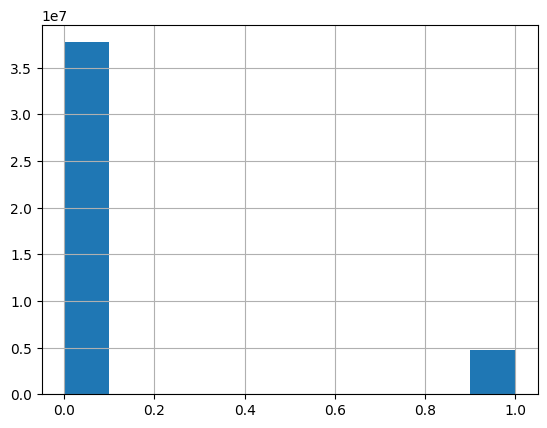

In [7]:
df['buy'].hist()

In [ ]:
session_features = df.groupby('user_session').agg({
    'user_id': 'first',
    'view_count': lambda x: (x == 'view').sum(),
    'cart_count': lambda x: (x == 'cart').sum(),
    'product_id': pd.Series.nunique,
    'general_category': pd.Series.nunique,
    'price': 'mean',  
    'buy': 'first'
}).reset_index()